# Physics 215 Mini Project: Centrally-Concentrated Artificial Star Cluster Generators in Julia

### by L. Lagman, A. Cruz, and D. To

In the paper titled "The statistical analysis of star clusters" by Annabel Cartwright and Anthony Witworth, the researchers reviewed a range of statistical methods for analyzing the structures of star clusters which are useful in comparing different observed clusters with each other and also in comparing observed clusters with numerical simulations. Three different types of artificial star clusters (ASCs): disc-like clusters 2D$\alpha$, spherical clusters 3D$\alpha$, and fractal star clusters F$D$ were created using random numbers to generate individual star positions. The researchers considered the separation distribution $\rho(s)$ and the minimum spanning tree (MST) of the generated stars in the ASCs and found out that the normalized correlation length $\bar{s}$ (the mean separation between stars in the cluster) and the normalized mean edge length $\bar{m}$ (the mean length of the branches of the ‘tree’ ) cannot be used as a tool to distinguish between a large-scale radial density gradient and multiscale subclustering. The researchers then derived a new measure $\mathcal{Q}$ given by $\mathcal{Q} = \frac{\bar{m}}{\bar{s}}$ which, on its own, can quantify and distinguish clusters between large-scale radial density gradient and multiscale subclustering.

In this project, however, we will not be dwelling with the complexities of the abovementioned statistical methods instead we will generate and visualize $2D\alpha$ and $3D\alpha$ ASCs and plot the distribution of separation of the individual stars using Julia which can be later used for the more advanced statistical analysis. The objectives in this project are as follows:
1. Create the necessary functions to generate ASCs
2. Visualize the star clusters
3. Visualize the distribution of separation of stars per ASC type
4. Inspect the performance of the ASC generating functions by adding benchmark functions

The methodology, parameters and equations used to achieve the goals on this project is taken from "Annabel Cartwright, Anthony P. Whitworth, The statistical analysis of star clusters, Monthly Notices of the Royal Astronomical Society, Volume 348, Issue 2, February 2004, Pages 589–598".


#### Run to install prerequisite packages

In [1]:
using Parameters, Random, Distributions, Plots, Distances, StatsPlots

# I. Create the ASC Generator Functions

## 1. `ASC_CW04_2Da` 
The first type (2Dα) are circular clusters (i.e. two-dimensional disc-like
clusters) with surface density $N ∝ r−\alpha$ and $\alpha = 0, 1$.
The cluster of type $2D\alpha$ is created by positioning the stars according
to the equation aforementioned below.


Follows CW04 for 2D star clusters of type $2D\alpha$, having the formulation for the distribution of cluster members:

\begin{align}
    r &= [(2-\alpha)R_r/2]^{1/(2-\alpha)} \\ 
    \phi &= 2\pi R_\phi \\
    x &= r\cos(\phi) \\ 
    y &= r\sin(\phi) \\ 
\end{align}

Wherein $R_r, R_\phi \in \{0,1\}$ and $\alpha = [0,1]$.

To implement via Julia, we compose a `mutable struct` called `ASC_CW04_2Da` which is composed of the following:

First, the mutable struct for $2D\alpha$ which defines the data types and the equations used, with preference to $n=1000$. As mentioned above, $R_r$ and ,$R_ϕ$ are randomly generated between 0 to 1. $α$ values for $2D\alpha$ ranges from $0,$ and $1$ . The $r$ and $ϕ$ are used to define the coordinates while the $x , y$ is used to convert the polar into cartesian coordinates for easier plotting.

Second, the plot function is used to plot the output ASC, with defaults `markersize=1.0, color="black", legend=false` together with plot size `size=(300,300)` in order to easily visualize the generated output. 

The output is a two-dimensional scatter plot within the $xy$-plane.

In [2]:
@with_kw mutable struct ASC_CW04_2Da
    n::Int64 = 1000
    a::Int64
    seed::Int64 = 69
    rng::MersenneTwister = Random.seed!(seed)
    
    R_r::Vector{Float64} = rand(Uniform(0,1),n)
    R_ϕ::Vector{Float64} = rand(Uniform(0,1),n)
    
    r::Vector{Float64} = (((2-a)*R_r)/2).^(1/(2-a))
    ϕ::Vector{Float64} = 2*pi*R_ϕ
    x::Vector{Float64} = r.*cos.(ϕ)
    y::Vector{Float64} = r.*sin.(ϕ) 
    
    cartesian::Matrix{Float64} = hcat(x, y)
    radial::Matrix{Float64} = hcat(r, ϕ)
end

function scatter_2D(ASC::ASC_CW04_2Da, 
        markersize::Float64=1.0, 
        color::String="black", 
        legend::Bool=false, 
        size::Tuple{Int64, Int64}=(300,300), args... ; kwargs...)
    
    return scatter(ASC.x, ASC.y, 
        markersize=markersize, color=color, legend=legend, size=size, args... ; kwargs...)
end

scatter_2D (generic function with 5 methods)

In [3]:
methods(ASC_CW04_2Da)

# 5 methods for type constructor:
[1] ASC_CW04_2Da(; n, a, seed, rng, R_r, R_ϕ, r, ϕ, x, y, cartesian, radial) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:493
[2] ASC_CW04_2Da(pp::ASC_CW04_2Da; kws...) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:569
[3] ASC_CW04_2Da(pp::ASC_CW04_2Da, di::AbstractDict) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:572
[4] ASC_CW04_2Da(pp::ASC_CW04_2Da, di::Tuple{Symbol, Any}...) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:573
[5] ASC_CW04_2Da(n, a, seed, rng, R_r, R_ϕ, r, ϕ, x, y, cartesian, radial) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:505

To test our code, we demonstrate by creating $2D\alpha$-type ASC with $\alpha=1$.

In [4]:
test_2D = ASC_CW04_2Da(a=1);

Note that the plot stayed within $r\approx0.5$ units. 

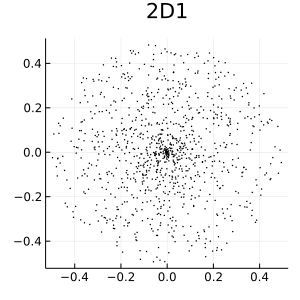

In [5]:
scatter_2D(test_2D, title="2D1")

With codes within one cell only, we can create ASCs for $α = [0, 1]$ and with $n=1000$ for both, then plot them.

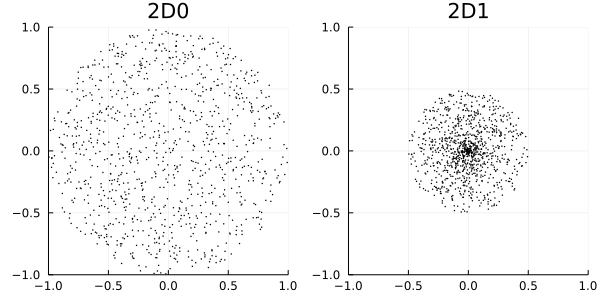

In [6]:
ASC_2D, plot_array = Any[], Any[]
name_2D_list = ["2D0", "2D1"]

for i ∈ [0,1]
    ASC = ASC_CW04_2Da(a=i);
    push!(ASC_2D, ASC)
end

for (ASC, title) ∈ zip(ASC_2D, name_2D_list)
    ASC_plot = scatter_2D(ASC, title=title, xlims=(-1,1), ylims=(-1,1))
    push!(plot_array, ASC_plot)
end

ASC_2Dα_plot = plot(plot_array..., size=(600,300), layout=(1,2))

In [7]:
#savefig(ASC_2Dα_plot, "Plots//ASC_2Dα.png")

 Recall that the radius $r$ is defined by $r=[(2-α)R_r/2]^{1/(2-α)}$. Which means that for $n=0$,  $r$ is $r=[R_r]^{1/(2)}$ which will have a maximum radius of $1$ . For $n=1$,  $r$ is $r=[R_r/2]$ which will have a maximum radius of $1/2$.

## 2. `ASC_CW04_3Da` 

Follows CW04 for 3D star clusters of type $3D\alpha$, having the formulation for the distribution of cluster members:

\begin{align}
    r &= [(3-\alpha)R_r/3]^{1/(3-\alpha)} \\ 
    \theta &= \cos^{-1}{(2R_\theta-1)} \\
    \phi &= 2\pi R_\phi \\
    x &= r\sin(\theta)\cos(\phi) \\ 
    y &= r\sin(\theta)\sin(\phi) \\ 
    z &= r\cos(\theta)
\end{align}

Wherein $R_r, R_\theta, R_\phi \in \{0,1\}$ and $\alpha = [0,1,2,2.9]$. Note that since $\alpha = 3$ can't be used, $\alpha = 2.9$ was chosen as a close approximate by CW04.

<blockquote>
    Three-dimensional clusters (types $3D\alpha$ and $FD$) are projected on to an arbitrary plane prior to analysis. Two-dimensional clusters are viewed face-on.
</blockquote>

The `mutable struct` `ASC_CW04_3Da` is constructed in the same manner as `ASC_CW04_2Da` but since ASCs of type $3D\alpha$ are three-dimensional in nature, then we added a `scatter_3D` component function to add a three-dimensional plotting capability:

In [8]:
@with_kw mutable struct ASC_CW04_3Da
    n::Int64 = 1000
    a::Float64
    seed::Int64 = 100
    rng::MersenneTwister = Random.seed!(seed)
    
    R_r::Vector{Float64} = rand(Uniform(0,1),n)
    R_θ::Vector{Float64} = rand(Uniform(0,1),n)
    R_ϕ::Vector{Float64} = rand(Uniform(0,1),n)
    
    r::Vector{Float64} = (((3-a)*R_r)/3).^(1/(3-a))
    θ::Vector{Float64} = acos.(2*R_θ.-1)
    ϕ::Vector{Float64} = 2*pi*R_ϕ
    
    x::Vector{Float64} = r.*sin.(θ).*cos.(ϕ)
    y::Vector{Float64} = r.*sin.(θ).*sin.(ϕ)
    z::Vector{Float64} = r.*cos.(θ)
    
    cartesian::Matrix{Float64} = hcat(x, y, z)
    spherical::Matrix{Float64} = hcat(r, θ, ϕ)
end

function scatter_2D(ASC::ASC_CW04_3Da, 
        markersize::Float64=1.0, 
        color::String="black", 
        legend::Bool=false, 
        size::Tuple{Int64, Int64}=(300,300), args... ; kwargs...)
    
    return scatter(ASC.x, ASC.y, 
        markersize=markersize, color=color, legend=legend, size=size, args... ; kwargs...)
end

function scatter_3D(ASC::ASC_CW04_3Da, 
        markersize::Float64=1.0, 
        color::String="black", 
        legend::Bool=false, 
        size::Tuple{Int64, Int64}=(300,300), args... ; kwargs...)
    
    return scatter(ASC.x, ASC.y, ASC.z,
        markersize=markersize, color=color, legend=legend, size=size, args... ; kwargs...)
end

scatter_3D (generic function with 5 methods)

In [9]:
methods(ASC_CW04_3Da)

# 5 methods for type constructor:
[1] ASC_CW04_3Da(; n, a, seed, rng, R_r, R_θ, R_ϕ, r, θ, ϕ, x, y, z, cartesian, spherical) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:493
[2] ASC_CW04_3Da(pp::ASC_CW04_3Da; kws...) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:569
[3] ASC_CW04_3Da(pp::ASC_CW04_3Da, di::AbstractDict) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:572
[4] ASC_CW04_3Da(pp::ASC_CW04_3Da, di::Tuple{Symbol, Any}...) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:573
[5] ASC_CW04_3Da(n, a, seed, rng, R_r, R_θ, R_ϕ, r, θ, ϕ, x, y, z, cartesian, spherical) in Main at C:\Users\Lanz\.julia\packages\Parameters\MK0O4\src\Parameters.jl:505

To test, we will do the plot of 3D$\alpha$. We set $\alpha = 2.9$ in order to see what the most centrally-concentrated ASC of type $3D\alpha$ would look like.

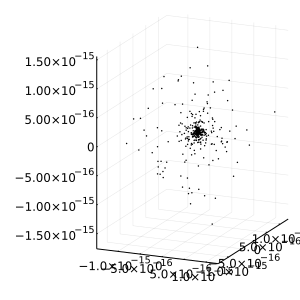

In [10]:
test_3D = ASC_CW04_3Da(a=2.9);
scatter_3D(test_3D)

It is interesting to see that at $\alpha=2.9$, the concentration is so high that the radius is within the scale of $r\approx 10^{-15}$.

We then create plots for $α = 0, 1, 2, 2.9 $ to see how they look like next to each other.

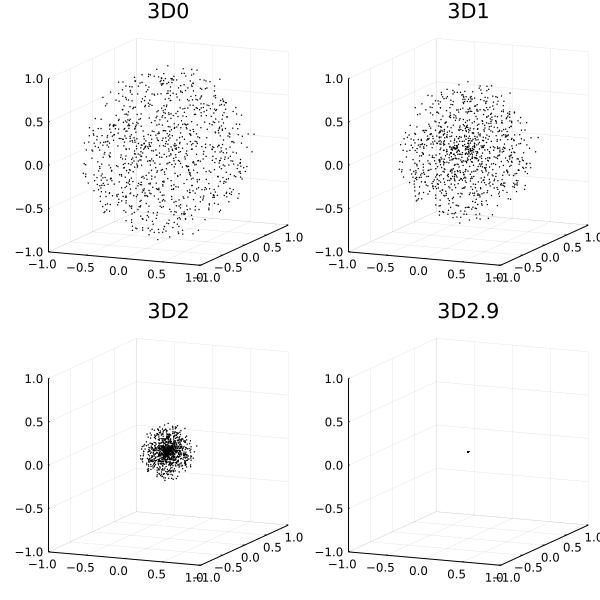

In [11]:
ASC_3D, plot_array = Any[], Any[]
name_3D_list = ["3D0", "3D1", "3D2", "3D2.9"]

for i ∈ [0,1,2,2.9]
    ASC = ASC_CW04_3Da(a=i);
    ASC.cartesian = ASC.cartesian
    ASC.x, ASC.y, ASC.z = ASC.cartesian[:,1], ASC.cartesian[:,2], ASC.cartesian[:,3]
    push!(ASC_3D, ASC)
end

for (ASC, title) in zip(ASC_3D, name_3D_list)
    ASC_plot = scatter_3D(ASC, title=title, xlims=(-1,1), ylims=(-1,1), zlims=(-1,1))
    push!(plot_array, ASC_plot)
end

ASC_3Dα_plot = plot(plot_array..., size=(600,600), layout=(2,2))

In [12]:
#savefig(ASC_2Dα_plot, "Plots//ASC_3Dα.png")

 Note that the radius $r$ is defined by $r= [(3-\alpha)R_r/3]^{1/(3-\alpha)}$. Which means that for $α=0$,  $r$ is $r=[R_r]^{1/3}$ which will have a maximum 
radius of $1$ . For $α=1$,  $r$ is $r=[2R_r/3]^{1/2}$ which will have a maximum radius of $0.8165$. For $α=2$,  $r$ is $r=[R_r/3]$ which will have a maximum radius of $0.33\ldots$.For $α=2.9$,  $r$ approaches to zero which is clearly shown in the plot above.

## Pairwise computation

One way to compare further analyze the generated ASC is to compute for the separation distribution of the individual stars making up the cluster. This is done by first calculating the unique pairwise distances of each stars and then plotting it. This will give some idea on how concentrated the stars in each cluster type are. 

In the code below, the pairwise distances of $2D\alpha$ and $3D\alpha$ ASCs composed of 1,000 stars were calculated using the Julia module `Distances.jl`. The `unique()` function is used to neglect repeating values. `pairwise(Euclidean())` is used to calculate the pairwise distances of the cartesian part of the `test_2D` and `test_3D` ASCs. The argument `dims=1` states that the passed vectors in the `pairwise()` function has the same number of columns.

The expected output is a list of pairwise distances which apparently also includes self-distances. A simple line of code such as,

`filter(!iszero, test_2D_pw)`

or

`filter(!iszero, test_3D_pw)`

will be able to fix the presence of zero distances. However, these zeros were not expected to cause any problems with the plotting of the separation distribution.

In [13]:
test_2D_pw = unique(pairwise(Euclidean(), test_2D.cartesian, dims=1));
test_3D_pw = unique(pairwise(Euclidean(), test_3D.cartesian, dims=1));

## Distribution Plot


Plotting the distribution of separation $\rho(s)$ is an easy task, thanks to the `StatsPlot.jl` module. A short line of code using the `density()` function will give a plot of $\rho(s)$ by passing the lists of pairwise distances namely test_2D_pw and test_3D_pw to the function. Minor modifications to the plot can be done like changing the plot's color by passing a string of the desired color, choosing whether a legend will appear or not by setting a boolean value in the `legend` argument, and changing the size of the plot.

To demonstrate:

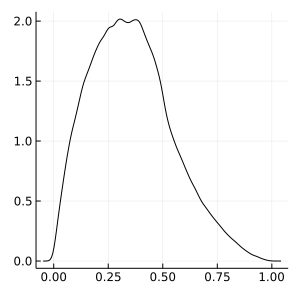

In [14]:
density(test_2D_pw, color="black", legend=false, size=(300,300))

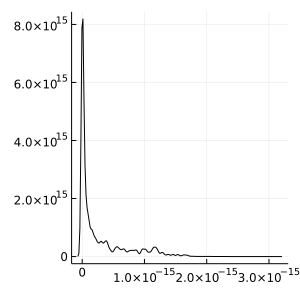

In [15]:
density(test_3D_pw, color="black", legend=false, size=(300,300))

## 3. `centroid_unity`

The function `centroid_unity` scales the distances such that the most distant star from the centroid is 1 arbitrary unit away. In this way, we can much normalize the ASCs so that they all have a radius of 1.

In [16]:
function centroid_unity(x::Matrix{Float64})
    centroid = x.-mean(x, dims=1)
    origin = zeros(Float64, 1, last(size(centroid))) 
    max_dist = pairwise(Euclidean(), centroid, origin, dims=1)
    return centroid/maximum(max_dist)
end

centroid_unity (generic function with 1 method)

# II. Visualize The Complete CW04 Star Clusters

The created function `centroid_unity()` is used in the code below to normalize the radius of the ASCs. Notice that the decrease in radius with increasing $\alpha$ in the plots earlier was fixed with the use of `centroid_unity()`. For easier comparison of the structures of each ASC types, subplots were created via for loop. The number of stars $n$ is set at 1,000 by default for a better picture of the ASCs.

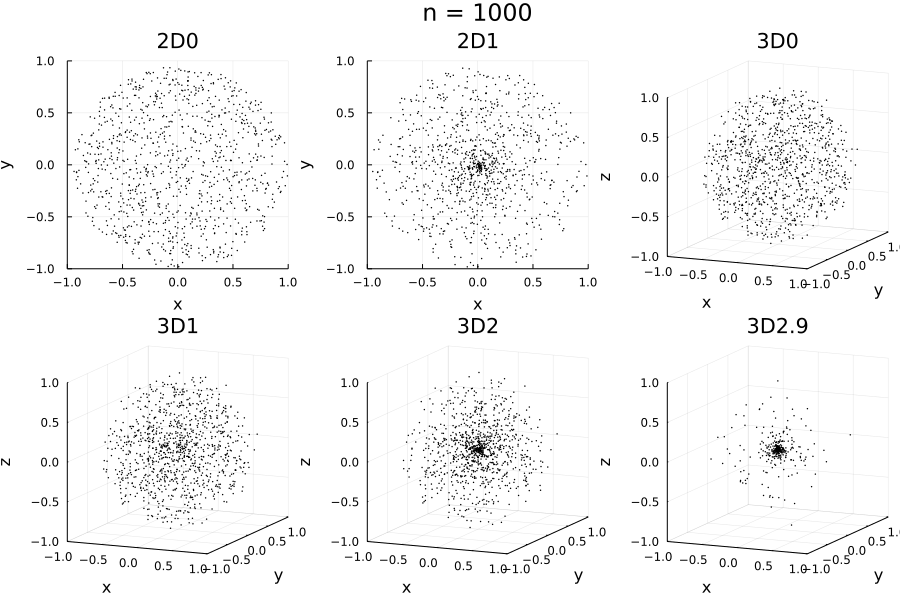

In [17]:
n_stars=1000

ASC_2D, ASC_3D = Any[], Any[]

for i ∈ [0,1]
    ASC = ASC_CW04_2Da(n=n_stars, a=i);
    ASC.cartesian = centroid_unity(ASC.cartesian)
    ASC.x, ASC.y = ASC.cartesian[:,1], ASC.cartesian[:,2]
    push!(ASC_2D, ASC)
end

for i ∈  [0,1,2,2.9]
    ASC = ASC_CW04_3Da(n=n_stars, a=i);
    ASC.cartesian = centroid_unity(ASC.cartesian)
    ASC.x, ASC.y, ASC.z = ASC.cartesian[:,1], ASC.cartesian[:,2], ASC.cartesian[:,3]
    push!(ASC_3D, ASC)
end

plot_array_final = Any[]
for (ASC, title) in zip(ASC_2D, name_2D_list)
    ASC_plot = scatter_2D(ASC, title=title, 
        xlims=(-1,1), ylims=(-1,1), 
        xlabel = "x", ylabel = "y")
    push!(plot_array_final, ASC_plot)
end

for (ASC, title) in zip(ASC_3D, name_3D_list)
    ASC_plot = scatter_3D(ASC, title=title, 
        xlims=(-1,1), ylims=(-1,1), zlims=(-1,1), 
        xlabel = "x", ylabel = "y", zlabel = "z")
    push!(plot_array_final, ASC_plot)
end

ASC_radial = plot(plot_array_final..., plot_title="n = $n_stars", size=(900,600), layout=(2,3))

In [18]:
#savefig(ASC_radial, "Plots//ASC_radial.png")

To visualize how the clusters evolve with increasing $n$, an animation of each ASC types was created with increasing $n$ from 10 stars to 1000 stars with an increment of 10. Notice that as $n$ increases, the stars become more centrally concentrated.

┌ Info: Saved animation to 
│   fn = C:\Users\Lanz\Desktop\DataScienceFolder\Julia\Physics 215 Output\Julia Project\Plots\Gif_ASC_Spatial.gif
└ @ Plots C:\Users\Lanz\.julia\packages\Plots\yfzIY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Lanz\\Desktop\\DataScienceFolder\\Julia\\Physics 215 Output\\Julia Project\\Plots\\Gif_ASC_Spatial.gif")
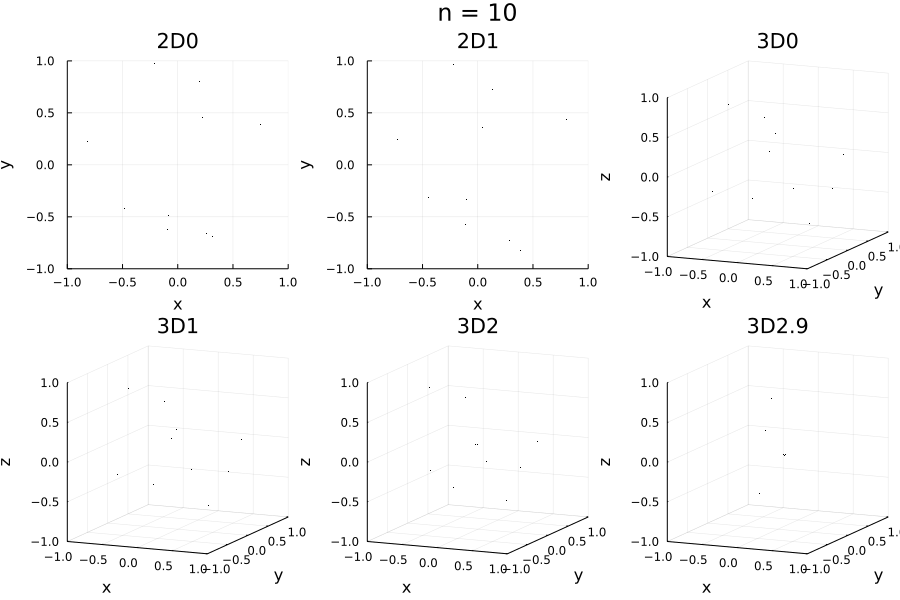

In [19]:
anim = @animate for n_stars ∈ 10:10:1000
    
    ASC_2D, ASC_3D = Any[], Any[]

    for i ∈ [0,1]
        ASC = ASC_CW04_2Da(n=n_stars, a=i);
        ASC.cartesian = centroid_unity(ASC.cartesian)
        ASC.x, ASC.y = ASC.cartesian[:,1], ASC.cartesian[:,2]
        push!(ASC_2D, ASC)
    end

    for i ∈  [0,1,2,2.9]
        ASC = ASC_CW04_3Da(n=n_stars, a=i);
        ASC.cartesian = centroid_unity(ASC.cartesian)
        ASC.x, ASC.y, ASC.z = ASC.cartesian[:,1], ASC.cartesian[:,2], ASC.cartesian[:,3]
        push!(ASC_3D, ASC)
    end

    plot_array_final = Any[]
    for (ASC, title) in zip(ASC_2D, name_2D_list)
        ASC_plot = scatter_2D(ASC, title=title, 
            xlims=(-1,1), ylims=(-1,1), 
            xlabel = "x", ylabel = "y")
        push!(plot_array_final, ASC_plot)
    end

    for (ASC, title) in zip(ASC_3D, name_3D_list)
        ASC_plot = scatter_3D(ASC, title=title, 
            xlims=(-1,1), ylims=(-1,1), zlims=(-1,1), 
            xlabel = "x", ylabel = "y", zlabel = "z")
        push!(plot_array_final, ASC_plot)
    end

    plot(plot_array_final..., plot_title="n = $n_stars", size=(900,600), layout=(2,3))
    
end

gif(anim, "Plots//Gif_ASC_Spatial.gif", fps = 5)

# III. Visualize The Pairwise Distance Distributions Within CW04 Star Clusters

The same thing is applied to visualize the separation distribution of each ASC. Once again, the default number of stars is 1,000. Notice that more condensed clusters such as 2D1, 3D2, and 3D2.9 tends to have a maximum value of $\rho(s)$ at smaller separations.

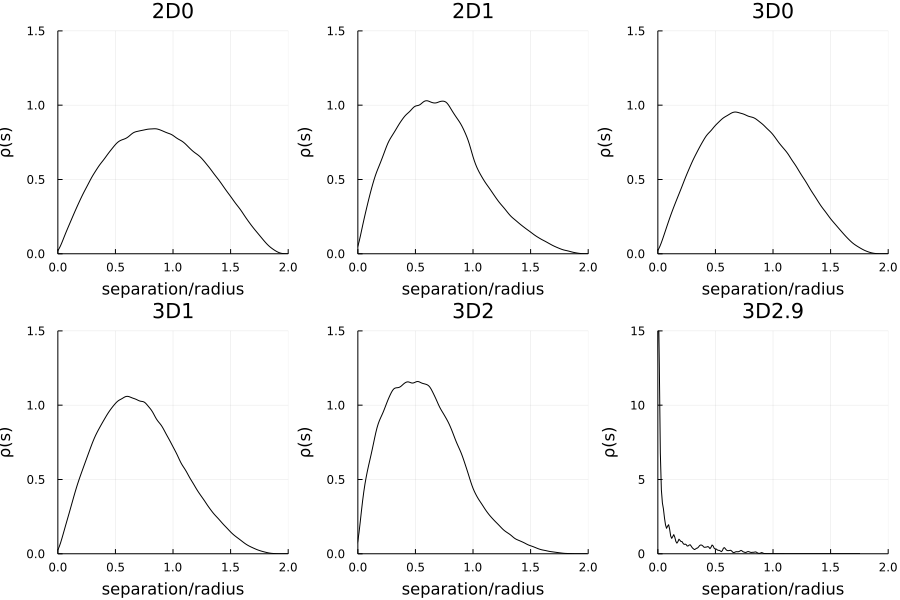

In [20]:
plot_array_pw = Any[]

for (ASC, title) in zip(ASC_2D, name_2D_list)
    
    ASC_2D_pw = unique(pairwise(Euclidean(), ASC.cartesian, dims=1))
    ASC_plot = density(ASC_2D_pw, title=title, 
        xlabel="separation/radius", ylabel="ρ(s)", 
        xlims=(0,2), ylims=(0,1.5),
        seriestype=:scatterhist, 
        color="black", legend=false, size=(300,300))
    push!(plot_array_pw, ASC_plot)
end

for (ASC, title) in zip(ASC_3D, name_3D_list)
    
    (title=="3D2.9") ? ylim_max=15 : ylim_max=1.5
    
    ASC_3D_pw = unique(pairwise(Euclidean(), ASC.cartesian[:,[1,2]], dims=1))
    ASC_plot = density(ASC_3D_pw, title=title, 
        xlabel="separation/radius", ylabel="ρ(s)",
        xlims=(0,2), ylims=(0,ylim_max),
        seriestype=:scatter, 
        color="black", legend=false, size=(300,300))
    push!(plot_array_pw, ASC_plot)
end

ASC_pairwise = plot(plot_array_pw..., size=(900,600), layout=(2,3))

In [21]:
#savefig(ASC_pairwise, "Plots//ASC_pairwise.png")

To see how the separation distribution evolves with increasing $n$, an animation is created with the value of $n$ increasing from 10 stars to 1000 stars with an increment of 10. Notice how the the 2D1 and 3D1 distinguishes themselves from other ASCs with respect to the concentration of stars at large values of $n$. On the other hand, it can be easily seen that the maximum $\rho(s)$ of 3D2.9 occurs at extremely small separations. The generated ASCs follows current observations in star clusters.

┌ Info: Saved animation to 
│   fn = C:\Users\Lanz\Desktop\DataScienceFolder\Julia\Physics 215 Output\Julia Project\Plots\Gif_ASC_Pairwise.gif
└ @ Plots C:\Users\Lanz\.julia\packages\Plots\yfzIY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Lanz\\Desktop\\DataScienceFolder\\Julia\\Physics 215 Output\\Julia Project\\Plots\\Gif_ASC_Pairwise.gif")
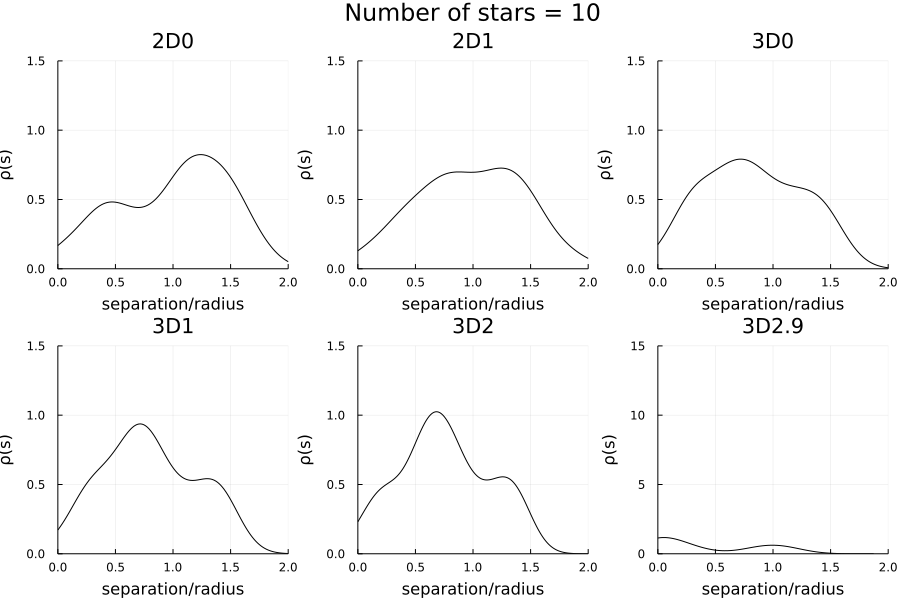

In [22]:
anim = @animate for n_stars ∈ 10:10:1000

    ASC_2D, plot_array = Any[], Any[]
    for i ∈ [0,1]
      ASC = ASC_CW04_2Da(n=n_stars, a=i);
      ASC.cartesian = centroid_unity(ASC.cartesian)
      push!(ASC_2D, ASC)
    end

    ASC_3D, plot_array = Any[], Any[]
    for i ∈ [0,1,2,2.9]
      ASC = ASC_CW04_3Da(n=n_stars, a=i);
      ASC.cartesian = centroid_unity(ASC.cartesian)
      push!(ASC_3D, ASC)
    end

    plot_array_pw = Any[]

    for (ASC, title) in zip(ASC_2D, name_2D_list)
      ASC_2D_pw = unique(pairwise(Euclidean(), ASC.cartesian, dims=1))
      ASC_plot = density(ASC_2D_pw, 
        title=title, xlabel="separation/radius", ylabel="ρ(s)", 
        xlims=(0,2), ylims=(0,1.5),
        seriestype=:scatterhist, 
        color="black", legend=false, size=(300,300))
      push!(plot_array_pw, ASC_plot)
    end

    for (ASC, title) in zip(ASC_3D, name_3D_list)

      (title=="3D2.9") ? ylim_max=15 : ylim_max=1.5

      ASC_3D_pw = unique(pairwise(Euclidean(), ASC.cartesian[:,[1,2]], dims=1))
      ASC_plot = density(ASC_3D_pw, title=title, xlabel="separation/radius", ylabel="ρ(s)",
        xlims=(0,2), ylims=(0,ylim_max),
        seriestype=:scatter, 
        color="black", legend=false, size=(300,300))
      push!(plot_array_pw, ASC_plot)
    end

    plot(plot_array_pw..., plot_title="Number of stars = $n_stars", size=(900,600), layout=(2,3))  

end

gif(anim, "Plots//Gif_ASC_Pairwise.gif", fps = 5)

# IV. Benchmarking Our `mutable struct`s

Timing the execution of the ASC generating functions is one of the ways to evaluate the performance of the ASC `mutable struct`s. 

One way of executing this is to create a function, say `runtime()`, that takes 2D and 3D ASCs as its argument and uses `@elapsed` to time the execution of the ASC generating function.

Another way is to use a for loop to generate a list of the execution times of every ASC generators per $n$ (number of stars) and $\alpha$. The for loop will perform 100 realizations per cluster type with $n$ ranging from 10 stars to 1000 stars with a step of 10 (to achieve 100 realizations).

In [23]:
time_2D0, time_2D1, time_3D0, time_3D1, time_3D2, time_3D2_9 = Any[], Any[], Any[], Any[], Any[], Any[]

for i ∈ 10:10:1000
    t_2D0 = @elapsed (ASC_CW04_2Da(n = i, a = 0))
    t_2D1 = @elapsed (ASC_CW04_2Da(n = i, a = 1))
    t_3D0 = @elapsed (ASC_CW04_3Da(n = i, a = 0))
    t_3D1 = @elapsed (ASC_CW04_3Da(n = i, a = 1))
    t_3D2 = @elapsed (ASC_CW04_3Da(n = i, a = 2))
    t_3D2_9 = @elapsed (ASC_CW04_3Da(n = i, a = 2.9))
    
    append!(time_2D0, t_2D0)
    append!(time_2D1, t_2D1)
    append!(time_3D0, t_3D0)
    append!(time_3D1, t_3D1)
    append!(time_3D2, t_3D2)
    append!(time_3D2_9, t_3D2_9)
end

time_list = [time_2D0, time_2D1, time_3D0, time_3D1, time_3D2, time_3D2_9];

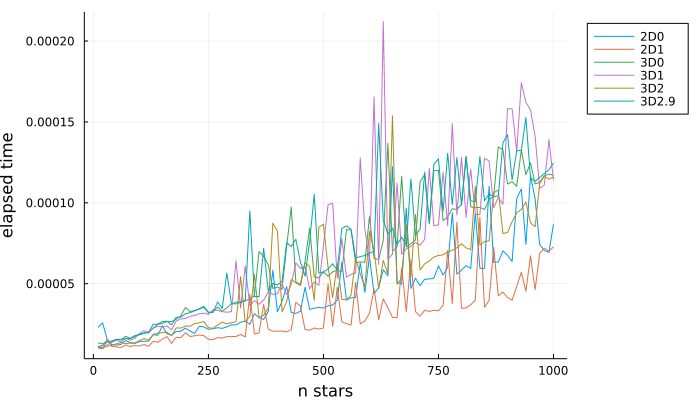

In [24]:
plot()
for (time, labels) ∈ zip(time_list, vcat(name_2D_list, name_3D_list))
    plot!(10:10:1000, time, 
        xlabel="n stars", ylabel="elapsed time",
        labels=labels, legend = :outertopright, size=(700,400))
end

ASC_benchmark = current()

In [25]:
#savefig(ASC_benchmark, "Plots//ASC_benchmark.png")

Plotting the list of execution times will help us have an idea about the performance of the ASC `mutable struct`s. 

Unfortunately, rerunning the two cells above will sometimes give different plots. It is notable that at some runs, there is a random huge spike. Depending on multiple runs, we can see that the $2D0$ cluster was executed the fastest while the $3D2.9$ cluster is the slowest.

In [26]:
for (time, labels) ∈ zip(last(time_list), vcat(name_2D_list, name_3D_list))
    println("$labels: $time seconds")
end

2D0: 1.09e-5 seconds
2D1: 1.19e-5 seconds
3D0: 1.4e-5 seconds
3D1: 1.46e-5 seconds
3D2: 1.57e-5 seconds
3D2.9: 1.55e-5 seconds


## SUMMARY:

Our combined output could be summarized as follows:

1. Create the necessary functions to generate ASCs.
- This was done using `mutable struct` which creates a function that generates the individual positions of the stars that will make up the ASC. A 2D$\alpha$ (`ASC_CW04_2Da()`) and 3D$\alpha$ (`ASC_CW04_3Da()`) version was created and the only differences between the two are the equations used in generating the positions of the stars and the arguments of each functions.

2. Visualize the star clusters.
- This was done by creating a plotter function separately for the 2D$\alpha$ (`scatter_2D()`) and 3D$\alpha$ (`scatter_3D()`) ASCs. The outputs of these plotters are disc-like scatter plot for the 2D$\alpha$ and a spherical scatter plot for the 3D$\alpha$. However, with increasing values of $\alpha$, the radius of the scatter plot decreases. In order to clearly visualize the plots of the ASCs, a function `centroid_unity` was created to compensate with the decreasing radius of the scatter plot.

3. Visualize the distribution of separation of stars per ASC type.
- The pairwise distances of each individual stars per ASC type was calculated using the `Distances.jl` module. Unique values were chosen using the `unique()` function and the pairwise distances of the generated ASCs were calculated using `pairwise(Euclidean())`. A straightforward approach was used in plotting the separation distribution using the `density()` function of the `StatsPlot.jl` module.

4. Inspect the performance of the ASC generating functions by adding benchmark functions
- `BenchmarkTools.jl` is used in testing the performance of the ASC generating functions. A for loop that generates a list of execution times per ASC type using `@elapsed` was utilized in order to do this. The results were then plotted in order to clearly inspect the performance of the functions. It is expected that the 2D0 cluster will run the fastest and the 3D2.9 cluster will run the slowest.

This mini project serves as a demonstration on how powerful Julia could be when used in astronomy and astrophysical research. A possible extension would be to replicate the analysis conducted by Cartwright and Whitworth, starting with the completion of the statistical analysis of all ASCs mentioned. Network construction routines, together with the $\mathcal{Q}$-parameter are sure to be added. 